新出现的函数：

- `match`
- `as.numeric`

In [1]:
USDA = read.csv("./data/USDA.csv")
str(USDA)

'data.frame':	7058 obs. of  16 variables:
 $ ID          : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ Description : Factor w/ 7054 levels "ABALONE,MIXED SPECIES,RAW",..: 1303 1302 1298 2303 2304 2305 2306 2307 2308 2309 ...
 $ Calories    : int  717 717 876 353 371 334 300 376 403 387 ...
 $ Protein     : num  0.85 0.85 0.28 21.4 23.24 ...
 $ TotalFat    : num  81.1 81.1 99.5 28.7 29.7 ...
 $ Carbohydrate: num  0.06 0.06 0 2.34 2.79 0.45 0.46 3.06 1.28 4.78 ...
 $ Sodium      : int  714 827 2 1395 560 629 842 690 621 700 ...
 $ SaturatedFat: num  51.4 50.5 61.9 18.7 18.8 ...
 $ Cholesterol : int  215 219 256 75 94 100 72 93 105 103 ...
 $ Sugar       : num  0.06 0.06 0 0.5 0.51 0.45 0.46 NA 0.52 NA ...
 $ Calcium     : int  24 24 4 528 674 184 388 673 721 643 ...
 $ Iron        : num  0.02 0.16 0 0.31 0.43 0.5 0.33 0.64 0.68 0.21 ...
 $ Potassium   : int  24 26 5 256 136 152 187 93 98 95 ...
 $ VitaminC    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VitaminE    : num  2.32 2.3

In [3]:
summary(USDA)

       ID       
 Min.   : 1001  
 1st Qu.: 8387  
 Median :13294  
 Mean   :14260  
 3rd Qu.:18337  
 Max.   :93600  
                
                                                       Description  
 BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVER CUT,LN,0" FA:   2  
 CAMPBELL,CAMPBELL'S SEL MICROWAVEABLE BOWLS,HEA             :   2  
 OIL,INDUSTRIAL,PALM KERNEL (HYDROGENATED),CONFECTION FAT    :   2  
 POPCORN,OIL-POPPED,LOFAT                                    :   2  
 ABALONE,MIXED SPECIES,RAW                                   :   1  
 ABALONE,MXD SP,CKD,FRIED                                    :   1  
 (Other)                                                     :7048  
    Calories        Protein         TotalFat       Carbohydrate   
 Min.   :  0.0   Min.   : 0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 85.0   1st Qu.: 2.29   1st Qu.:  0.72   1st Qu.:  0.00  
 Median :181.0   Median : 8.20   Median :  4.37   Median :  7.13  
 Mean   :219.7   Mean   :11.71   Mean   : 10

注意到`Sodium`列的最大值特别大。调查一下。

In [5]:
which.max(USDA$Sodium)

[1] 265

`names`返回各列的名称。帮助找到想要的列名。

In [6]:
names(USDA)

[1] "ID"           "Description"  "Calories"     "Protein"      "TotalFat"    
 [6] "Carbohydrate" "Sodium"       "SaturatedFat" "Cholesterol"  "Sugar"       
[11] "Calcium"      "Iron"         "Potassium"    "VitaminC"     "VitaminE"    
[16] "VitaminD"

想要的列名是`Description`。

In [7]:
USDA$Description[265]

[1] SALT,TABLE
7054 Levels: ABALONE,MIXED SPECIES,RAW ABALONE,MXD SP,CKD,FRIED ... ZWIEBACK

100克食盐含38758毫克的钠。这并不奇怪，也没有人会吃这么多盐。更感兴趣的是，含钠多的非盐的食品。

In [8]:
HighSodium = subset(USDA, Sodium > 10000)
nrow(HighSodium)

[1] 10

In [9]:
HighSodium$Description

[1] SALT,TABLE                                             
 [2] SOUP,BF BROTH OR BOUILLON,PDR,DRY                      
 [3] SOUP,BEEF BROTH,CUBED,DRY                              
 [4] SOUP,CHICK BROTH OR BOUILLON,DRY                       
 [5] SOUP,CHICK BROTH CUBES,DRY                             
 [6] GRAVY,AU JUS,DRY                                       
 [7] ADOBO FRESCO                                           
 [8] LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,NA AL SULFATE
 [9] LEAVENING AGENTS,BAKING SODA                           
[10] DESSERTS,RENNIN,TABLETS,UNSWTND                        
7054 Levels: ABALONE,MIXED SPECIES,RAW ABALONE,MXD SP,CKD,FRIED ... ZWIEBACK

鱼子酱（caviar）是公认的高钠食物，却没有出现在这里。用`match`专门找一下它，得出100克鱼子酱含1500毫克钠。

In [10]:
match("CAVIAR", USDA$Description)

[1] 4154

In [11]:
USDA$Sodium[4154]

[1] 1500

In [12]:
summary(USDA$Sodium)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    37.0    79.0   322.1   386.0 38760.0      84 

In [13]:
sd(USDA$Sodium)

[1] NA

移除`NA`。

In [14]:
sd(USDA$Sodium, na.rm=TRUE)

[1] 1045.417

鱼子酱的含钠量在均值的一个标准差外。确实含钠量很高。

看看蛋白质和脂肪含量的关系。

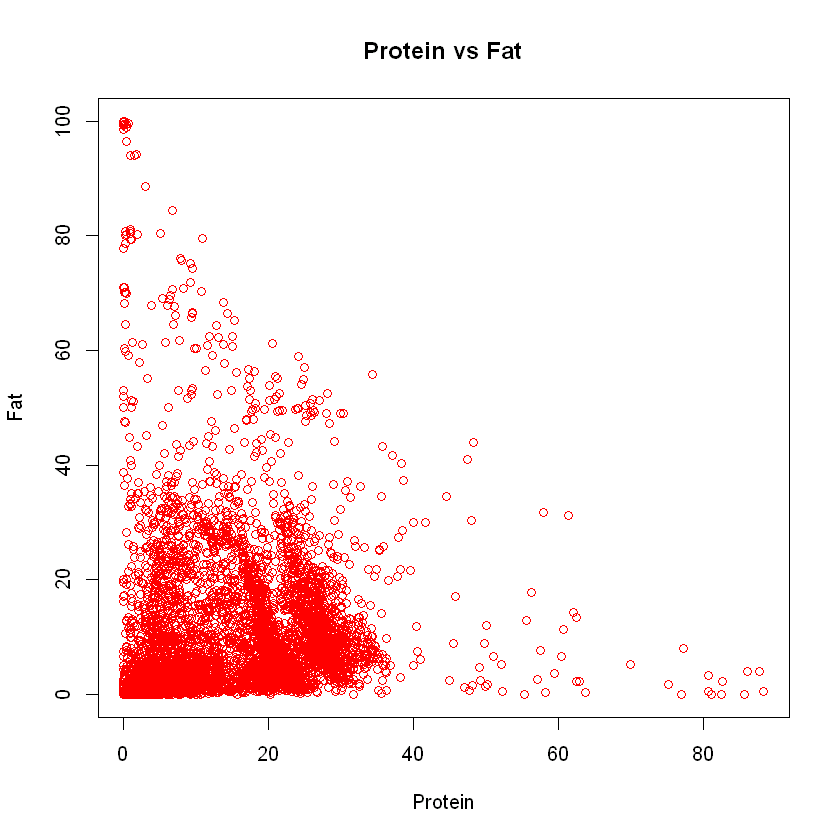

In [16]:
plot(USDA$Protein, USDA$TotalFat, xlab="Protein", ylab="Fat", main="Protein vs Fat", col="red")

下面的直方图看不出分布。

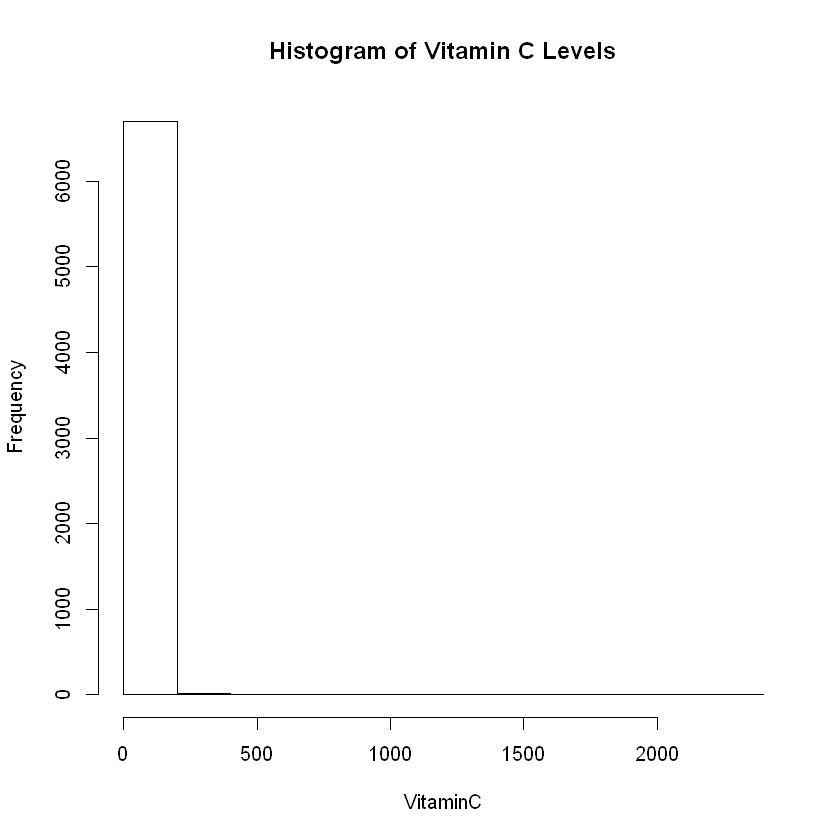

In [18]:
hist(USDA$VitaminC, xlab="VitaminC", main="Histogram of Vitamin C Levels")

加上`xlim`。限定在图中希望看到的横坐标的最小值和最大值。

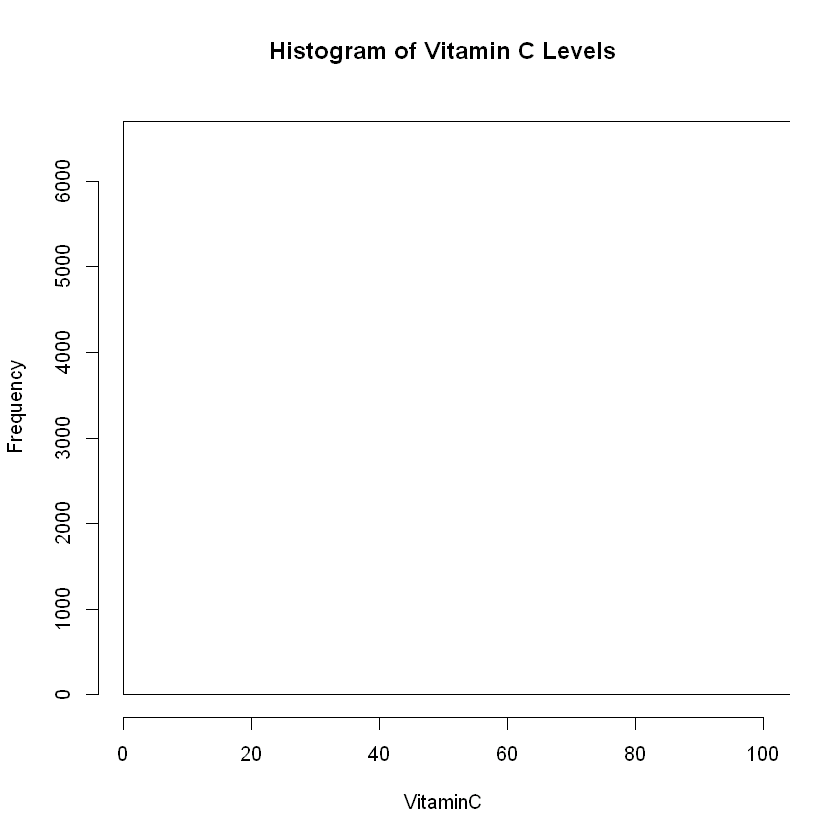

In [19]:
hist(USDA$VitaminC, xlab="VitaminC", main="Histogram of Vitamin C Levels", xlim=c(0, 100))

发现只有一个大块。加上`breaks`，希望能把坐标切成100份。既然最小值和最大值的差为100，那么我们期望每一份长度均为1。

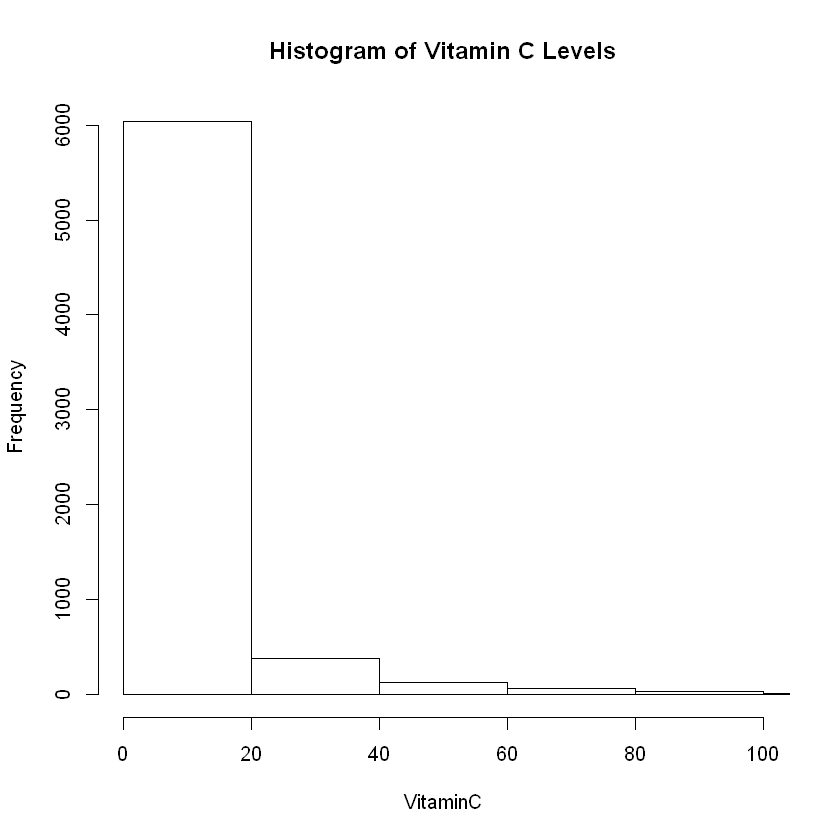

In [3]:
hist(USDA$VitaminC, xlab="VitaminC", main="Histogram of Vitamin C Levels", xlim=c(0, 100), breaks=100)

实际并非如此：每一份的长度为20。原因在于横坐标上的实际最大取值为2000，因此把[0,2000]切分成100份，则每份长度为20。我们还是希望把每份的长度设为1，因此设`breaks=2000`。

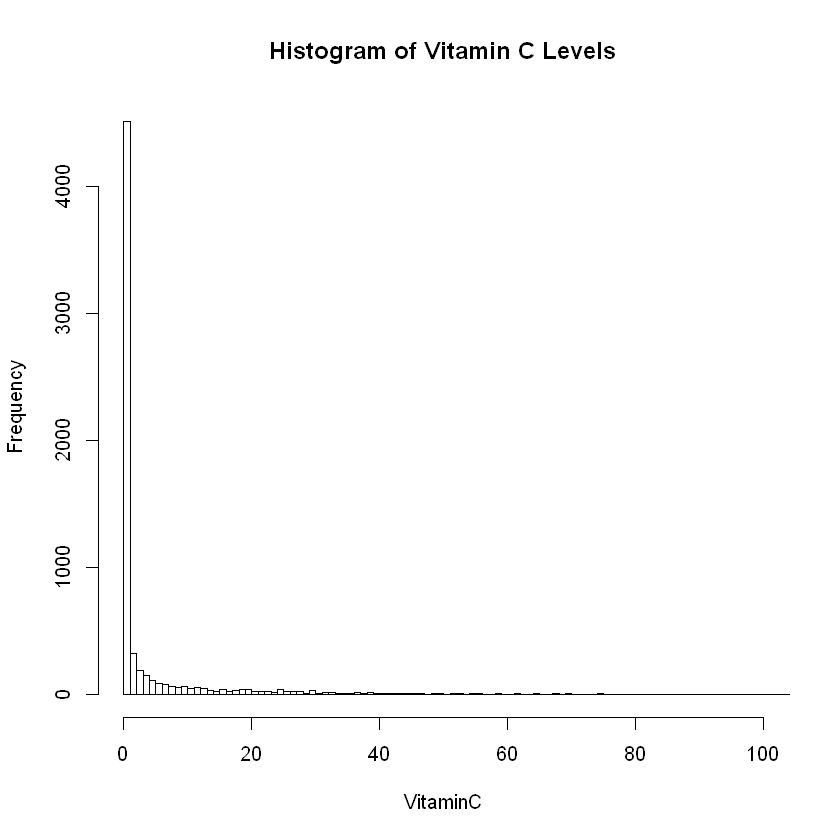

In [4]:
hist(USDA$VitaminC, xlab="VitaminC", main="Histogram of Vitamin C Levels", xlim=c(0, 100), breaks=2000)

发现超过5000种食物只含低于1克的维他命C。

看看糖的分布。发现食物含糖量的均值很低。

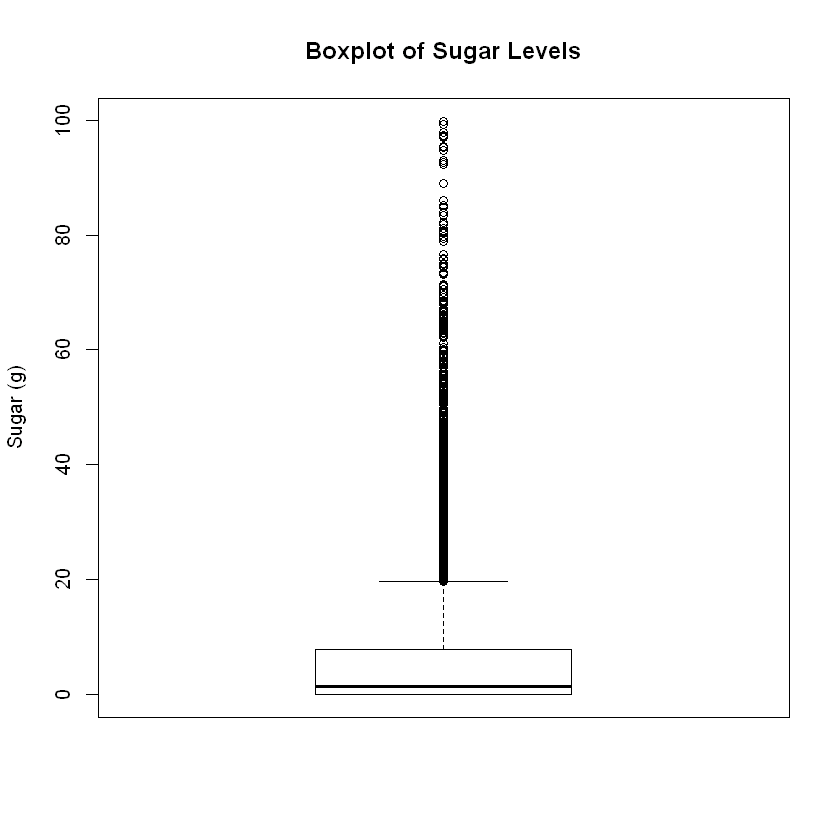

In [5]:
boxplot(USDA$Sugar, main="Boxplot of Sugar Levels", ylab="Sugar (g)")

希望创建新列，记录“含钠量是否高于均值”。

In [8]:
HighSodium = USDA$Sodium > mean(USDA$Sodium, na.rm=TRUE)

In [9]:
str(HighSodium)

 logi [1:7058] TRUE TRUE FALSE TRUE TRUE TRUE ...


希望它们表示成0和1，使用`as.numeric`。

In [11]:
HighSodium = as.numeric(USDA$Sodium > mean(USDA$Sodium, na.rm=TRUE))
str(HighSodium)

 num [1:7058] 1 1 0 1 1 1 1 1 1 1 ...


将新列加入`USDA`这个`dataframe`。

In [12]:
USDA$HighSodium = as.numeric(USDA$Sodium > mean(USDA$Sodium, na.rm=TRUE))
str(USDA)

'data.frame':	7058 obs. of  17 variables:
 $ ID          : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ Description : Factor w/ 7054 levels "ABALONE,MIXED SPECIES,RAW",..: 1303 1302 1298 2303 2304 2305 2306 2307 2308 2309 ...
 $ Calories    : int  717 717 876 353 371 334 300 376 403 387 ...
 $ Protein     : num  0.85 0.85 0.28 21.4 23.24 ...
 $ TotalFat    : num  81.1 81.1 99.5 28.7 29.7 ...
 $ Carbohydrate: num  0.06 0.06 0 2.34 2.79 0.45 0.46 3.06 1.28 4.78 ...
 $ Sodium      : int  714 827 2 1395 560 629 842 690 621 700 ...
 $ SaturatedFat: num  51.4 50.5 61.9 18.7 18.8 ...
 $ Cholesterol : int  215 219 256 75 94 100 72 93 105 103 ...
 $ Sugar       : num  0.06 0.06 0 0.5 0.51 0.45 0.46 NA 0.52 NA ...
 $ Calcium     : int  24 24 4 528 674 184 388 673 721 643 ...
 $ Iron        : num  0.02 0.16 0 0.31 0.43 0.5 0.33 0.64 0.68 0.21 ...
 $ Potassium   : int  24 26 5 256 136 152 187 93 98 95 ...
 $ VitaminC    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VitaminE    : num  2.32 2.3

类似地，创建新列，记录“含x量是否高于均值”。

In [13]:
USDA$HighProtein = as.numeric(USDA$Protein > mean(USDA$Protein, na.rm=TRUE))
USDA$HighFat = as.numeric(USDA$TotalFat > mean(USDA$TotalFat, na.rm=TRUE))
USDA$HighCarbs = as.numeric(USDA$Carbohydrate > mean(USDA$Carbohydrate, na.rm=TRUE))
str(USDA)

'data.frame':	7058 obs. of  20 variables:
 $ ID          : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ Description : Factor w/ 7054 levels "ABALONE,MIXED SPECIES,RAW",..: 1303 1302 1298 2303 2304 2305 2306 2307 2308 2309 ...
 $ Calories    : int  717 717 876 353 371 334 300 376 403 387 ...
 $ Protein     : num  0.85 0.85 0.28 21.4 23.24 ...
 $ TotalFat    : num  81.1 81.1 99.5 28.7 29.7 ...
 $ Carbohydrate: num  0.06 0.06 0 2.34 2.79 0.45 0.46 3.06 1.28 4.78 ...
 $ Sodium      : int  714 827 2 1395 560 629 842 690 621 700 ...
 $ SaturatedFat: num  51.4 50.5 61.9 18.7 18.8 ...
 $ Cholesterol : int  215 219 256 75 94 100 72 93 105 103 ...
 $ Sugar       : num  0.06 0.06 0 0.5 0.51 0.45 0.46 NA 0.52 NA ...
 $ Calcium     : int  24 24 4 528 674 184 388 673 721 643 ...
 $ Iron        : num  0.02 0.16 0 0.31 0.43 0.5 0.33 0.64 0.68 0.21 ...
 $ Potassium   : int  24 26 5 256 136 152 187 93 98 95 ...
 $ VitaminC    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VitaminE    : num  2.32 2.3

下面考察各种变量的相关关系。

In [14]:
table(USDA$HighSodium)


   0    1 
4884 2090 

In [15]:
table(USDA$HighSodium, USDA$HighFat)

   
       0    1
  0 3529 1355
  1 1378  712

In [16]:
tapply(USDA$Iron, USDA$HighProtein, mean, na.rm=TRUE)

0        1 
2.558945 3.197294

In [17]:
tapply(USDA$VitaminC, USDA$HighCarbs, summary, na.rm=TRUE)

ERROR: Error in vapply(seq_along(mapped), function(i) {: 值的长度必需为1，
 但FUN(X[[1]])结果的长度却是0


$`0`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   0.000    0.000    0.000    6.364    2.800 1678.000      248 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.20   16.31    4.50 2400.00      83 
